In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import time 
import BoundaryLayerToolbox as BLT #Este es el módulo que estoy haciendo
% matplotlib inline

In [2]:
file = 'wrfout_d02_2012-05-30_00:00:00.nc'

In [3]:
nc = Dataset(file, 'r')

In [4]:
g = 9.8
T = nc.variables['T']
u = nc.variables['U']
v = nc.variables['V']
T2 = nc.variables['T2']
PH = nc.variables['PH']
PHB = nc.variables['PHB']
PBLH = nc.variables['PBLH']
relieve = nc.variables['HGT']

In [5]:
xlat = nc.variables['XLAT']
xlong = nc.variables['XLONG']

xlat_u = nc.variables['XLAT_U']
xlong_u = nc.variables['XLONG_U']

xlat_v = nc.variables['XLAT_V']
xlong_v = nc.variables['XLONG_V']

<a list of 13 text.Text objects>

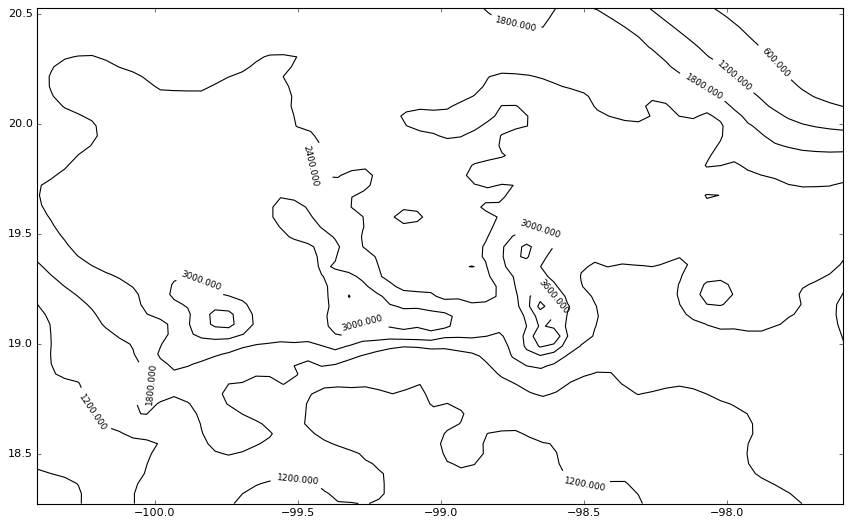

In [6]:
fig = plt.figure(figsize=(13,8))
Cs = plt.contour(xlong[0,:,:], xlat[0,:, :], relieve[0, :, :], colors= 'k')
plt.clabel(Cs, fontsize = 8) 

In [7]:
u_interpol = BLT.interpolate_velocity(xlong, xlat, xlong_u, xlat_u, u, uu = True)
v_interpol = BLT.interpolate_velocity(xlong, xlat, xlong_v, xlat_v, v, uu = False)

In [8]:
u_interpol.shape

(97, 59, 51, 60)

In [9]:
v_interpol.shape

(97, 59, 51, 60)

In [11]:
Z = BLT.compute_height(PH, PHB)

In [12]:
Z.shape

(97, 59, 51, 60)

### Comparación con el aeropuerto de la Ciudad de México

- Station latitude: 19.40
- Station longitude: -99.20

In [13]:
xlong[0,0,:][25]

-99.216087

In [14]:
np.abs(xlong[0, 0, :] - -99.20)[25]

0.016090393

In [15]:
min(xlong[0,0,:])

-100.41079

In [16]:
xlat[0,:,0]

array([ 18.27414703,  18.31951904,  18.36487579,  18.41022491,
        18.45556641,  18.50089264,  18.54620361,  18.59149933,
        18.63677979,  18.68206787,  18.72732544,  18.77258301,
        18.81781769,  18.86304474,  18.90826416,  18.95346069,
        18.9986496 ,  19.04383087,  19.08899689,  19.13414764,
        19.1792984 ,  19.22442627,  19.26954651,  19.31464386,
        19.35974121,  19.40481567,  19.44988251,  19.49494171,
        19.53997803,  19.58501434,  19.63002777,  19.67503357,
        19.72002411,  19.76499939,  19.80995941,  19.85491943,
        19.8998642 ,  19.9447937 ,  19.98970795,  20.03460693,
        20.07949829,  20.12437439,  20.16923523,  20.21408844,
        20.25892639,  20.30374908,  20.34856415,  20.39336395,
        20.4381485 ,  20.48291779,  20.52767944], dtype=float32)

In [17]:
range(0, len(xlong[0,0,:]))

range(0, 60)

In [18]:
def near_coord(xlong, xlat, loclong, loclat):
    
    distlog = np.abs(xlong[0,0,:] - loclong)
    distlat = np.abs(xlat[0,:,0] - loclat)
    nx = 0
    ny = 0
    
    for i in range(0, len(xlong[0,0,:])):
        
        if distlog[i] < distlog[ny]:
            ny = i
            
    for j in range(0, len(xlat[0,:,0])):
        
        if distlat[j] < distlat[nx]:
            nx = j
            
    return nx, ny

In [19]:
np.abs(xlong[0,0,:] - -99.20)[25]

0.016090393

In [20]:
xlong.shape

(97, 51, 60)

In [21]:
xlong[0,0,:] - xlong[0,15,:]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00955963,  0.00955963,  0.00956726,
        0.00955963,  0.00955963,  0.00956726,  0.00955963,  0.00955963,
        0.00956726,  0.00955963,  0.00956726,  0.00956726,  0.00955963,
        0.00956726,  0.00955963,  0.00955963,  0.00956726,  0.00955963,
        0.00955963,  0.00956726,  0.00955963,  0.00955963,  0.00956726,
        0.00955963,  0.00955963,  0.00956726,  0.00955963,  0.00955963,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ], dtype=float32)

In [22]:
near_coord(xlong, xlat, -99.20, 19.40)

(25, 25)

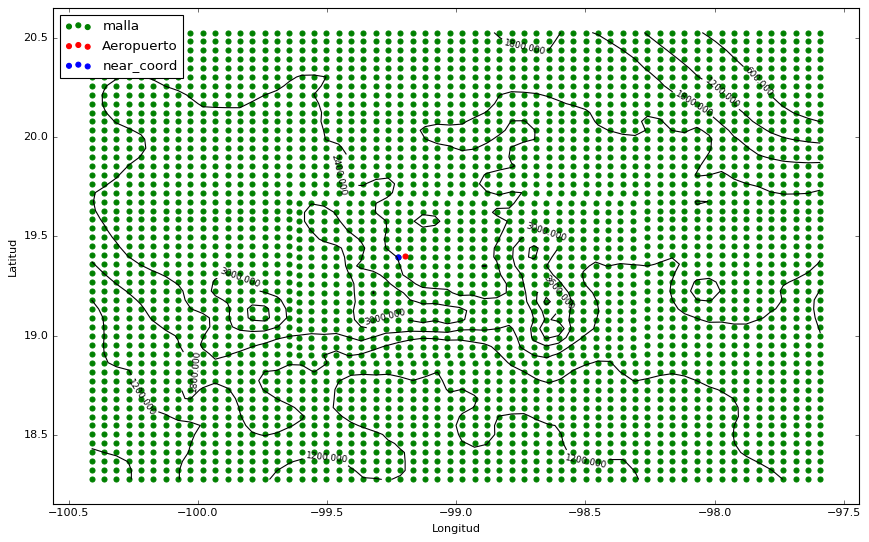

In [25]:
fig = plt.figure(figsize=(13,8))
Cs = plt.contour(xlong[0,:,:], xlat[0,:, :], relieve[0, :, :], colors= 'k')
plt.clabel(Cs, fontsize = 8)
plt.scatter(xlong[0,:,:], xlat[0,:,:], color='g', label=('malla'))
plt.scatter(-99.20, 19.40, color='r', label=('Aeropuerto'))
plt.scatter(xlong[0,25,25], xlat[0,25,25], color='b', label=('near_coord'))
plt.legend(loc = 2)
plt.xlabel('Longitud')
plt.ylabel('Latitud')

### Comparación coordenadas aeropuerto CDMX

- Station latitude: 19.40
- Station longitude: -99.20

In [26]:
ix, iy = near_coord(xlong, xlat, -99.20, 19.40)

In [27]:
xlong[0, ix, iy]

-99.225655

In [28]:
xlat[0, ix, iy]

19.395798

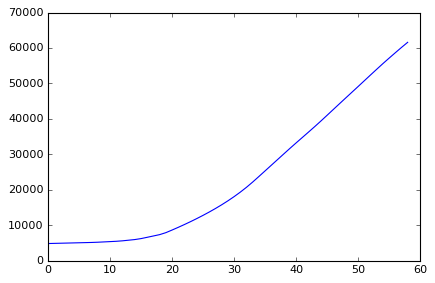

In [30]:
plt.plot(Z[0,:, ix, iy])


In [31]:
relieve[0,ix, iy]

2389.27

In [32]:
Z[0,0, ix, iy]

4804.9033